In [1]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

import numpy as np 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from helpers import plot
from pre_processing import pre_processing

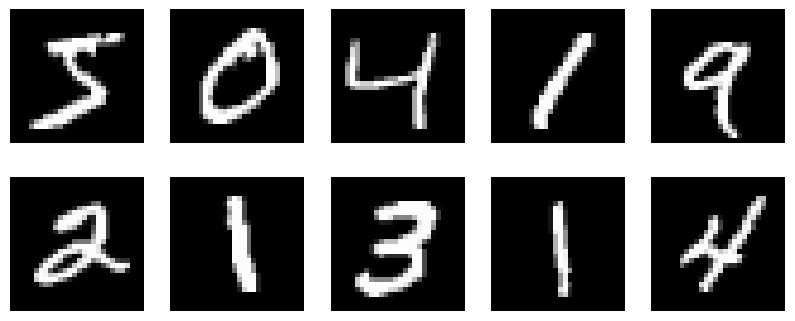

Normalizing...: 100%|██████████| 10000/10000 [00:00<00:00, 241099.07it/s]


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
plot.display_imgs(x_train)

x_train, y_train, encoder, classes = pre_processing.pre_processing(x_train, y_train)
x_test, y_test, encoder, classes = pre_processing.pre_processing(x_test, y_test, encoder)

In [3]:
# from models import Decision_Tree

# decision_tree = Decision_Tree.DecisionTree()

# decision_tree.fit(
#     X = x_train,
#     y = y_train
# )

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 989us/step - accuracy: 0.8510 - loss: 0.5300 - val_accuracy: 0.9158 - val_loss: 0.2991
Epoch 2/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 936us/step - accuracy: 0.9093 - loss: 0.3183 - val_accuracy: 0.9153 - val_loss: 0.2955
Epoch 3/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 957us/step - accuracy: 0.9165 - loss: 0.2981 - val_accuracy: 0.9154 - val_loss: 0.2946
Epoch 4/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 926us/step - accuracy: 0.9174 - loss: 0.2930 - val_accuracy: 0.9228 - val_loss: 0.2809
Epoch 5/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 925us/step - accuracy: 0.9225 - loss: 0.2743 - val_accuracy: 0.9193 - val_loss: 0.2896
Epoch 6/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9214 - loss: 0.2760 - val_accuracy: 0.9212 - val_loss: 0.2842
Epoch 7/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9236 - loss: 0.2787 - val_accuracy: 0.9236 - val_loss: 0.2794
Epoch 8/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9225 - loss:

d:\hoc-AI-ML\Học AI\OREILLY DL from scratch\Mnist_Handwriting_Digit\helpers\plot.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


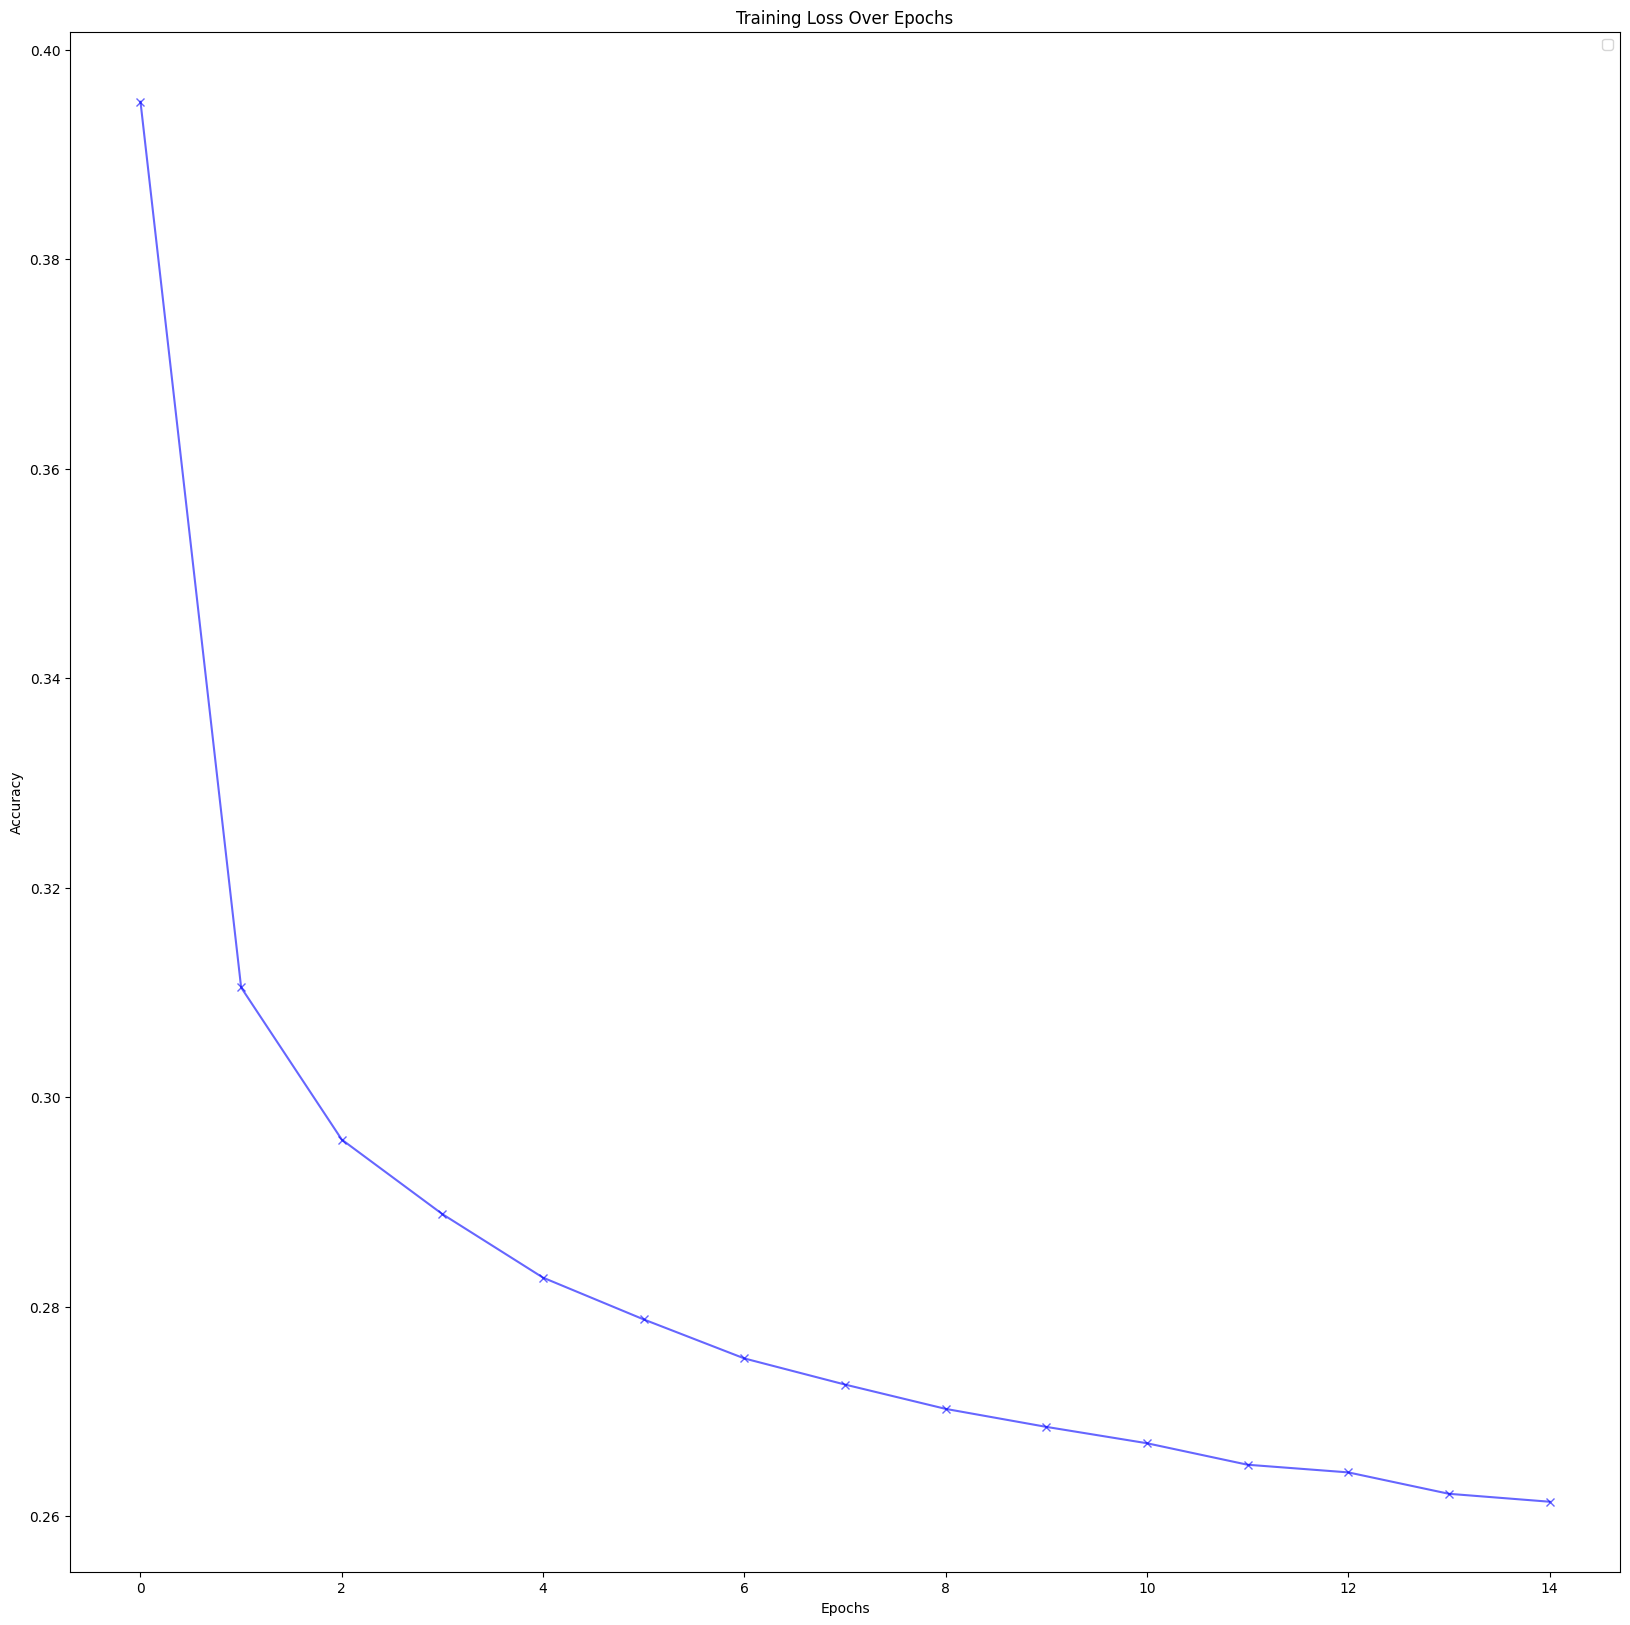

In [4]:
from models import Softmax_Regression

softmax_regression = Softmax_Regression.SoftmaxRegression(
    input_shape = x_train[0].shape,
    output_shape = len(classes),
    learning_rate = 0.1,
    epochs = 15,
    batchsize = 16
)

softmax_regression.fit(X = x_train, y = y_train)

In [5]:
y_predict_prob = softmax_regression.predict(x_test)
y_predict = np.argmax(y_predict_prob, axis = 1)
y_true = np.argmax(y_test, axis = 1)

accuracy = accuracy_score(y_true, y_predict)
print(f"Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
Accuracy: 0.9222


In [6]:
print("\nClassification Report:")
print(classification_report(y_true, y_predict))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.88      0.93      0.91      1032
           3       0.91      0.90      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.96      0.89      0.93      1028
           8       0.91      0.87      0.89       974
           9       0.88      0.92      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



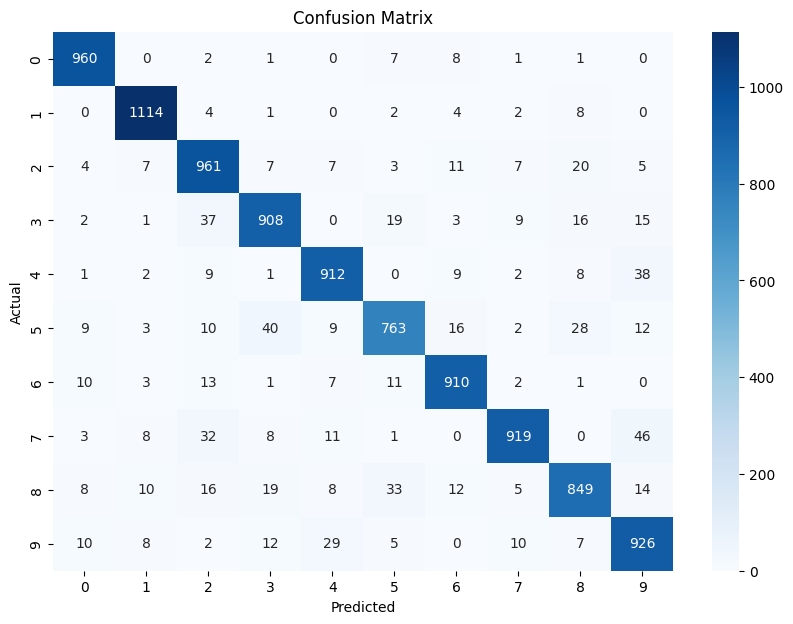

In [7]:
conf_matrix = confusion_matrix(y_true, y_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,618 (424.29 KB)

 Trainable params: 108,618 (424.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8664 - loss: 0.4343 - val_accuracy: 0.9655 - val_loss: 0.1325
Epoch 2/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9338 - loss: 0.2384 - val_accuracy: 0.9732 - val_loss: 0.0972
Epoch 3/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9412 - loss: 0.2127 - val_accuracy: 0.9696 - val_loss: 0.1358
Epoch 4/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9427 - loss: 0.2157 - val_accuracy: 0.9722 - val_loss: 0.1175
Epoch 5/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9464 - loss: 0.2016 - val_accuracy: 0.9730 - val_loss: 0.1127
Epoch 6/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9444 - loss: 0.2148 - val_accuracy: 0.9742 - val_loss: 0.1076
Epoch 7/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9447 - loss: 0.2152 - val_accuracy: 0.9753 - val_loss: 0.1098
Epoch 8/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9459 - loss: 0

d:\hoc-AI-ML\Học AI\OREILLY DL from scratch\Mnist_Handwriting_Digit\helpers\plot.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


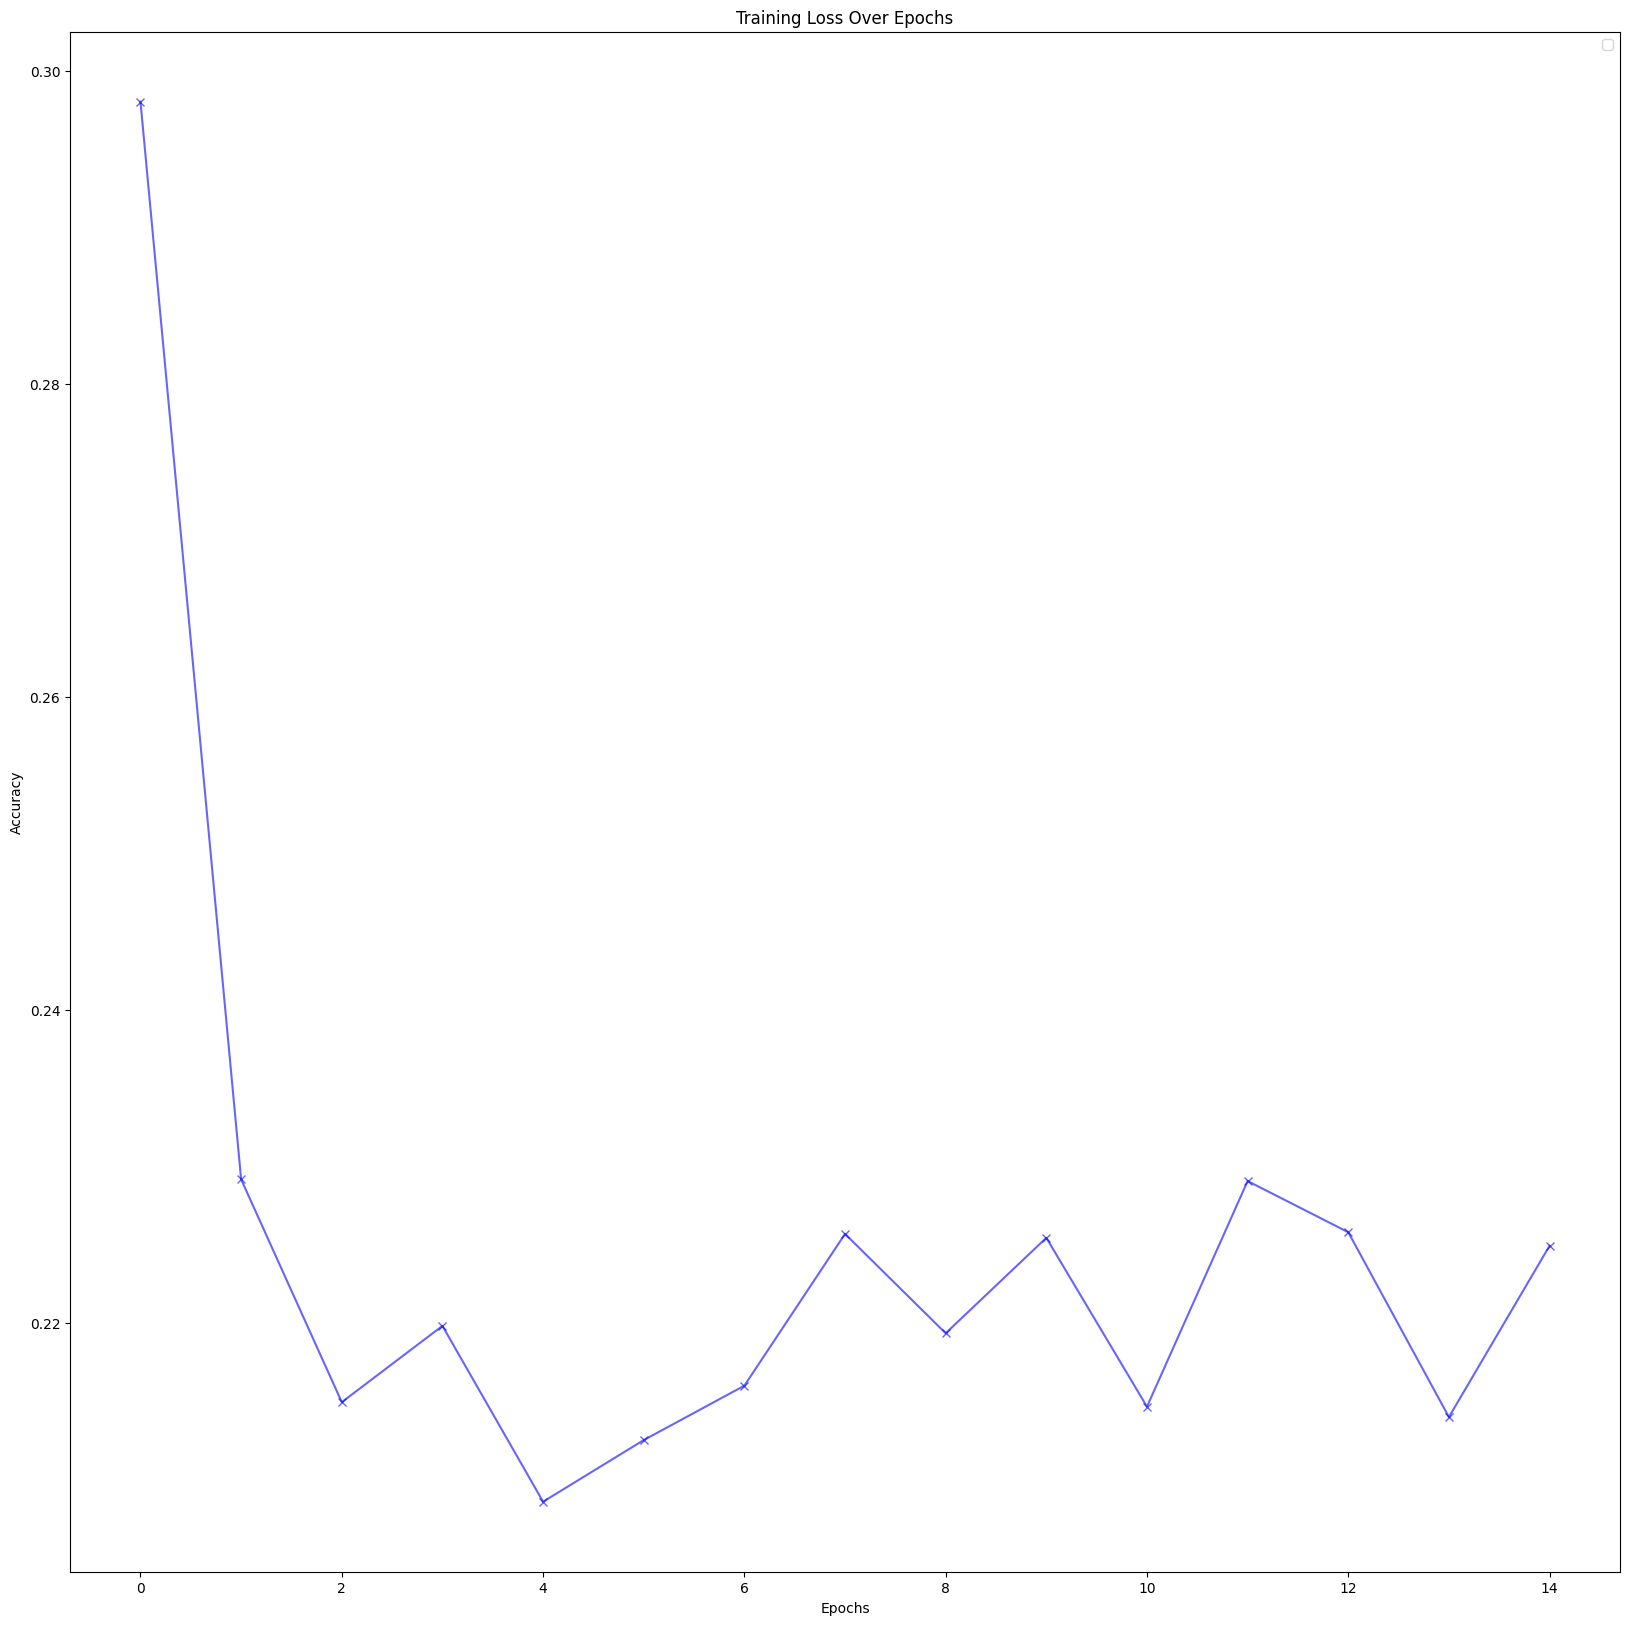

In [8]:
from models import CNN

if len(x_train[0].shape) != 3:
    x_train = np.expand_dims(x_train, axis=-1)

basic_cnn = CNN.CNN(
    input_shape = x_train[0].shape,
    output_shape = len(classes),
    lr = 0.01,
    epochs = 15,
    batch_size = 16
)

basic_cnn.fit(x_train, y_train)

In [9]:
if len(x_test[0].shape) != 3:
    x_test = np.expand_dims(x_test, axis=-1)

y_predict_prob = basic_cnn.predict(x_test)
y_predict = np.argmax(y_predict_prob, axis = 1)
y_true = np.argmax(y_test, axis = 1)

accuracy = accuracy_score(y_true, y_predict)
print(f"Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9688


In [10]:
print("\nClassification Report:")
print(classification_report(y_true, y_predict))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.99      0.96      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.99      0.96      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.92      0.96      0.94       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



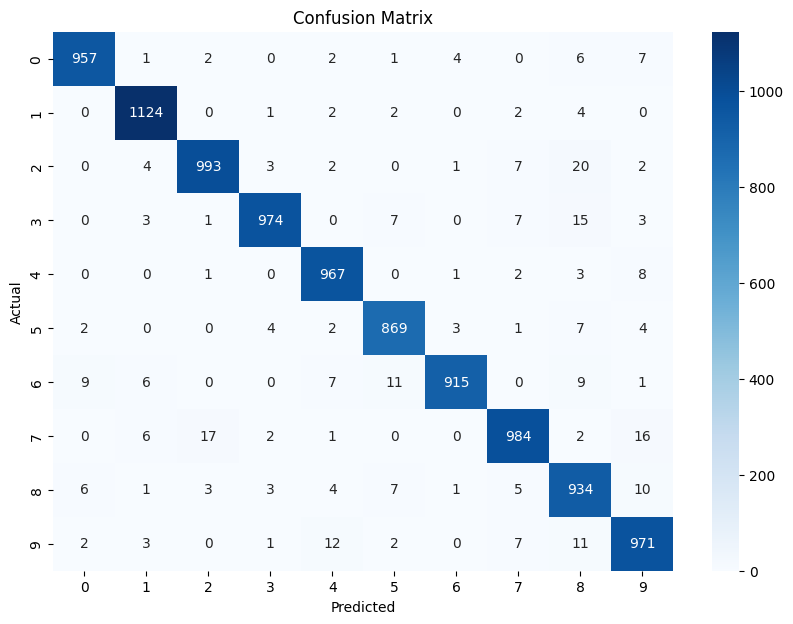

In [11]:
conf_matrix = confusion_matrix(y_true, y_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

